# Focus: Time Series

## ARIMA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.tsa.api as smts
import statsmodels.tsa.stattools as smtst

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox

from itertools import product
import tqdm

In [2]:
df = pd.read_csv('time_series.csv', index_col='Date', parse_dates=True)
df

,y
Date,
2012-10-02,1938.0
2012-10-03,3521.0
2012-10-04,3475.0
2012-10-05,3148.0
2012-10-06,2006.0
...,...
2014-05-27,5032.0
2014-05-28,4008.0
2014-05-29,4587.0


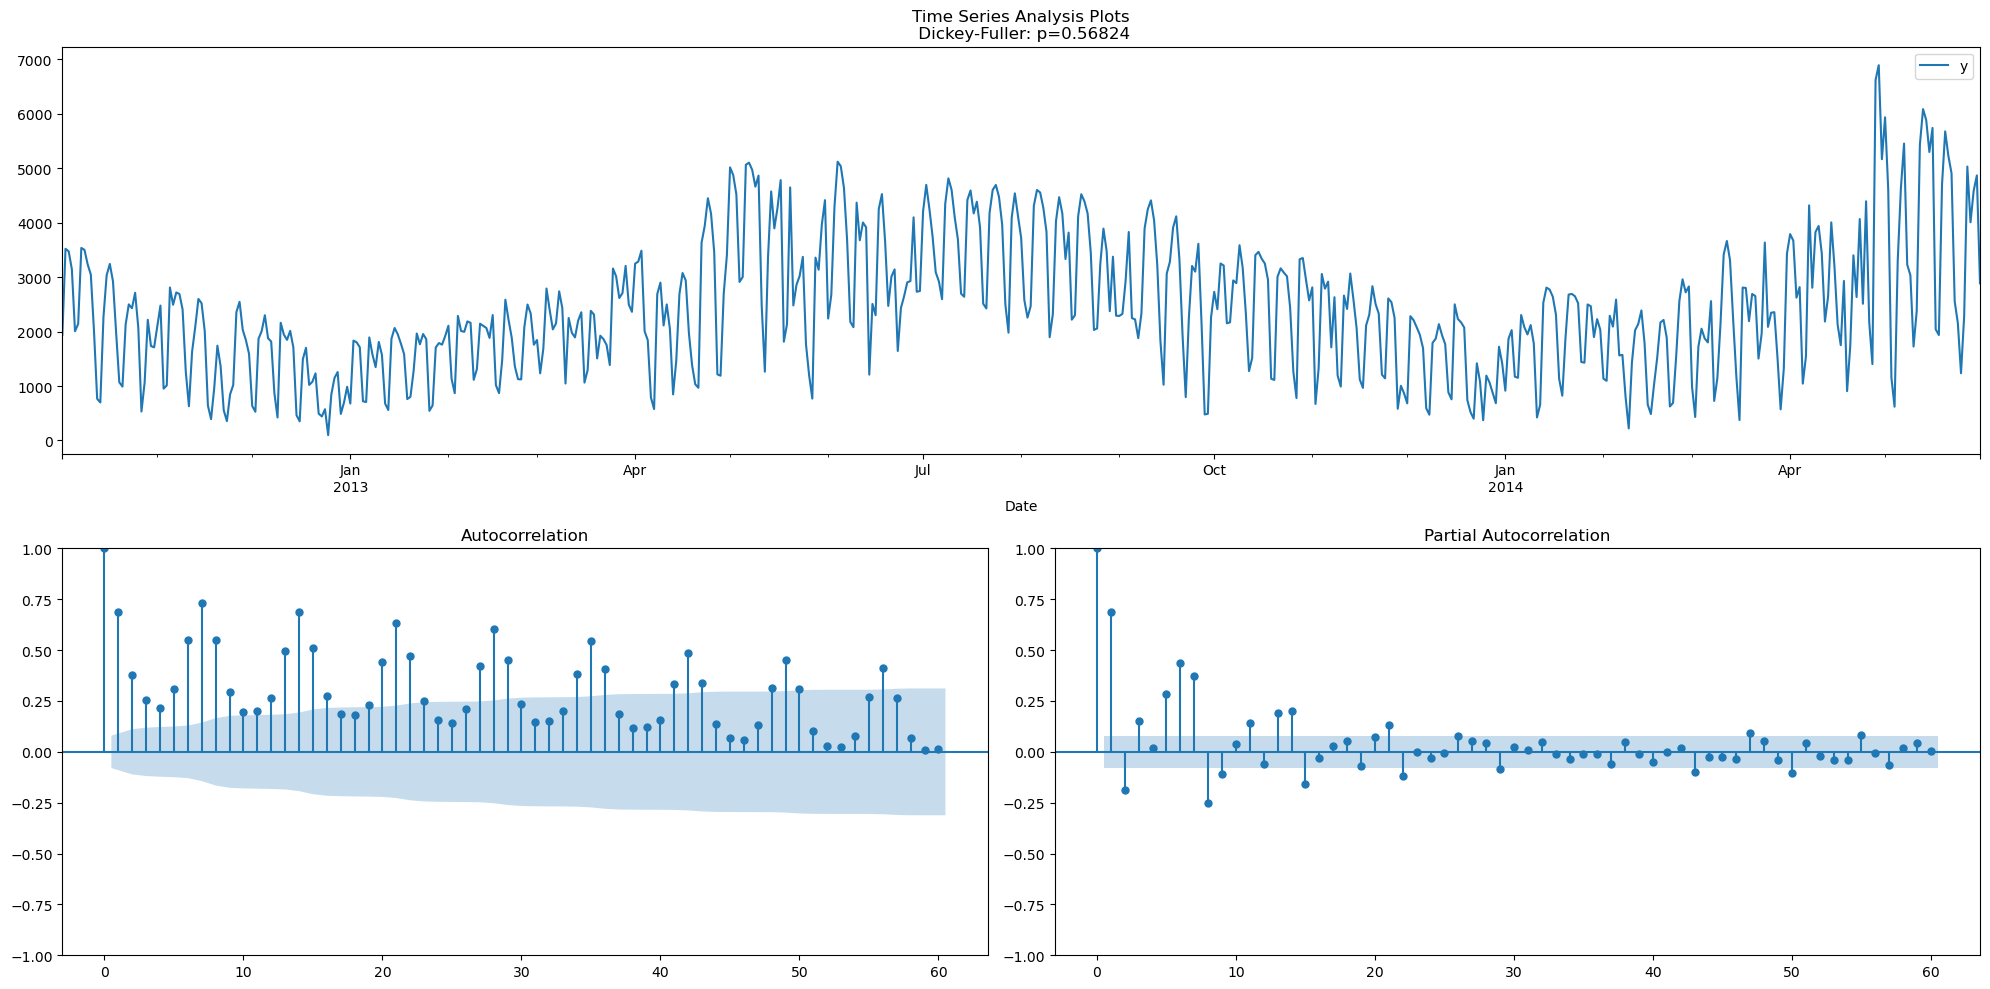

In [3]:
def tsplot(y, lags=None, figsize=(20, 10), title=None):
    fig = plt.figure(figsize=figsize)

    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    p_value = smts.adfuller(y)[1]
    if title is None:
        title = 'Time Series Analysis Plots'
    ts_ax.set_title('{0}\n Dickey-Fuller: p={1:.5f}'.format(title, p_value))
    
    smts.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smts.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    plt.tight_layout()

tsplot(df, lags=60)

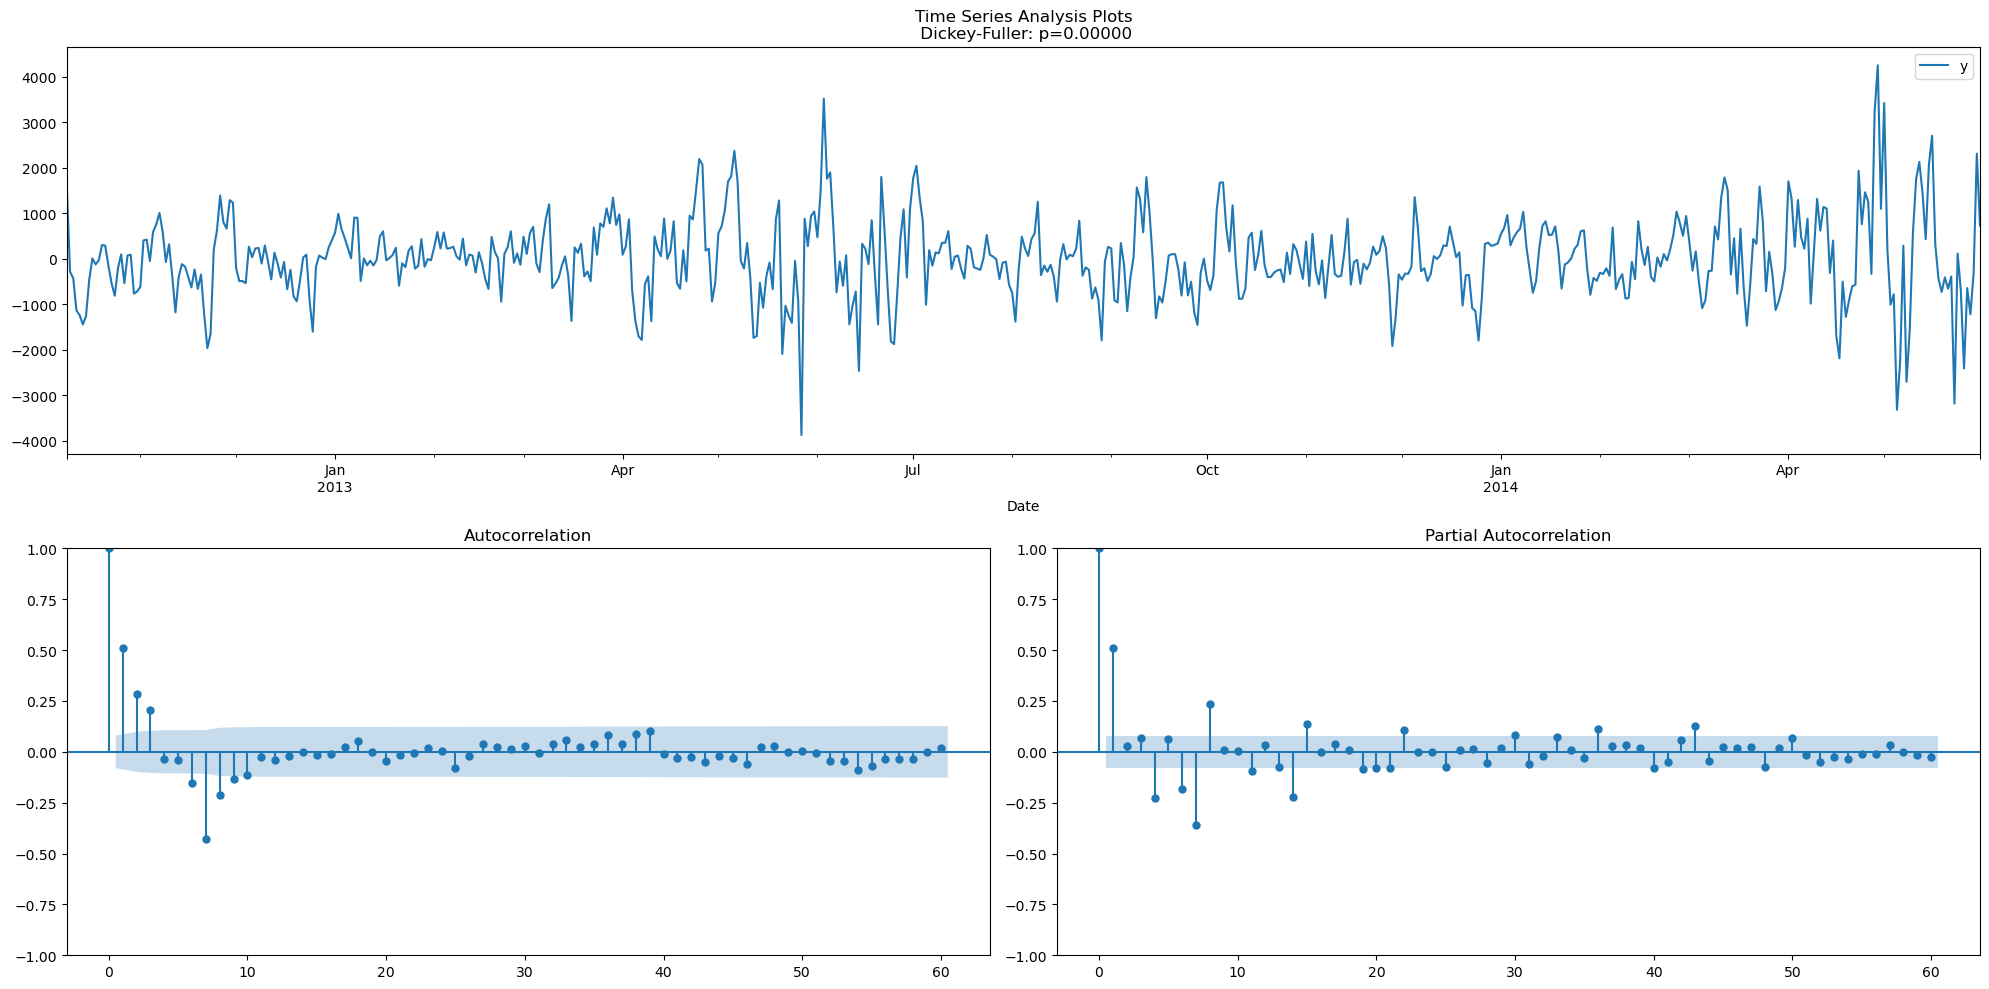

In [4]:
df_sdiff = (df - df.shift(7)).dropna()
tsplot(df_sdiff, lags=60)

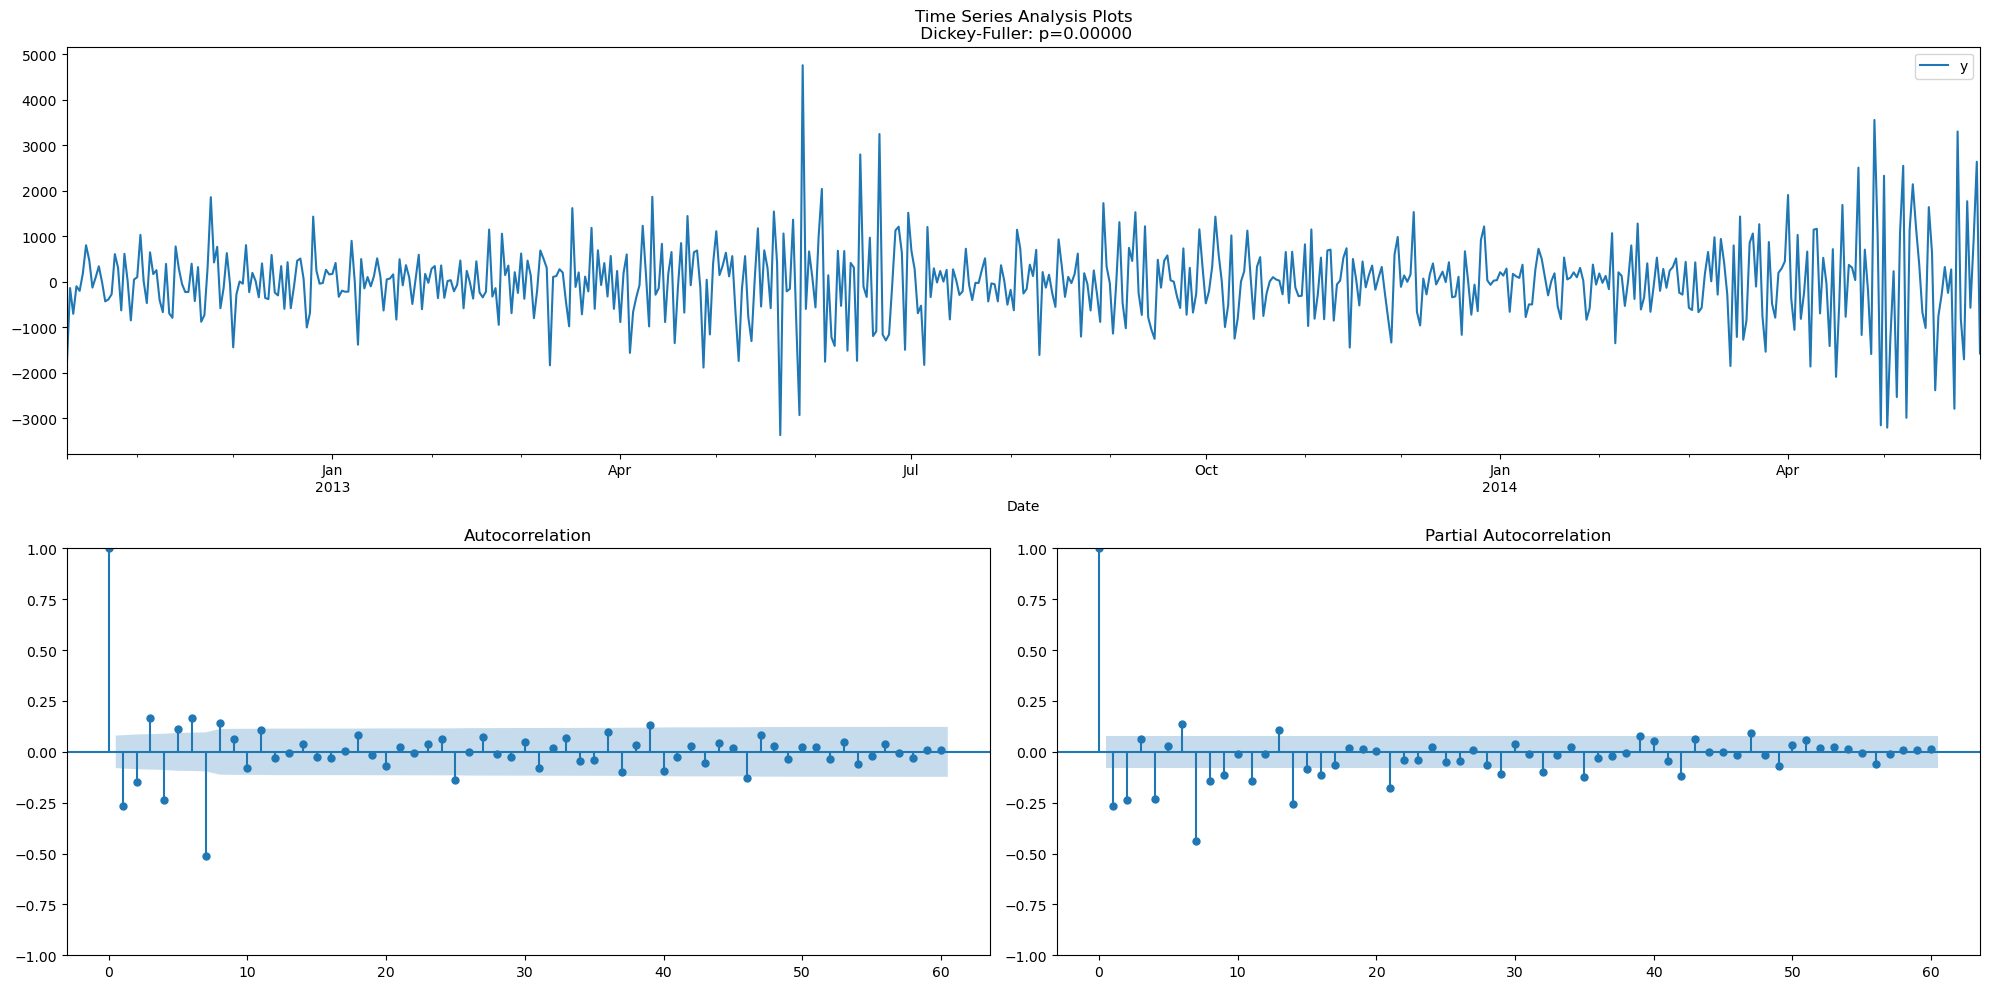

In [5]:
df_2diff = df_sdiff.diff().dropna()
tsplot(df_2diff, lags=60)

In [6]:
candidate_model = sm.tsa.statespace.SARIMAX(df, order=(0, 1, 6), seasonal_order=(0, 1, 1, 7)).fit()
candidate_model.summary()

C:\Users\silve\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\silve\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  607
Model:             SARIMAX(0, 1, 6)x(0, 1, [1], 7)   Log Likelihood               -4671.220
Date:                             Sun, 03 Dec 2023   AIC                           9358.439
Time:                                     23:58:25   BIC                           9393.601
Sample:                                 10-02-2012   HQIC                          9372.128
                                      - 05-31-2014                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3710      0.031    -12.036      0.000      -0.431      -0.311
ma.L2         -0.2547      0.038     -6.753      0.000      -0.329      -0.181
ma.L3         -0.0418      0.034     -1.221      0.222      -0.109       0.025
ma.L4         -0.2354      0.035     -6.637      0.000      -0.305      -0.166
ma.L5          0.0191      0.037      0.514      0.607      -0.054       0.092
ma.L6          0.0523      0.035      1.501      0.133      -0.016       0.120
ma.S.L7       -0.9324      0.015    -61.301      0.000      -0.962      -0.903
sigma2      3.394e+05   1.35e+04     25.215      0.000    3.13e+05    3.66e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               219.02
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.29   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

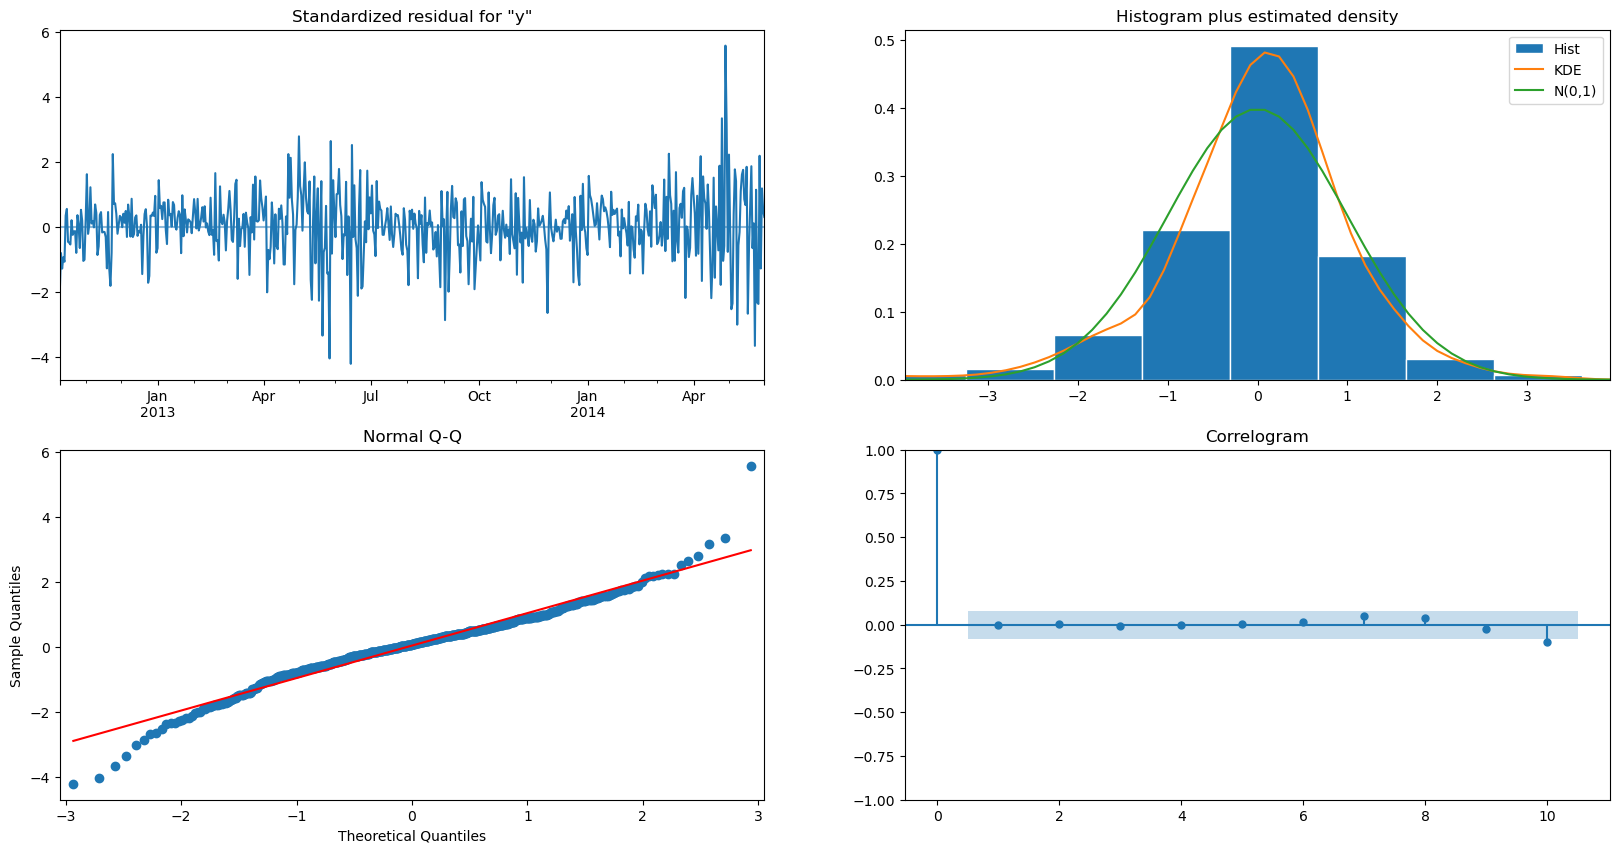

In [7]:
candidate_model.plot_diagnostics(figsize=(20,10))
plt.show()

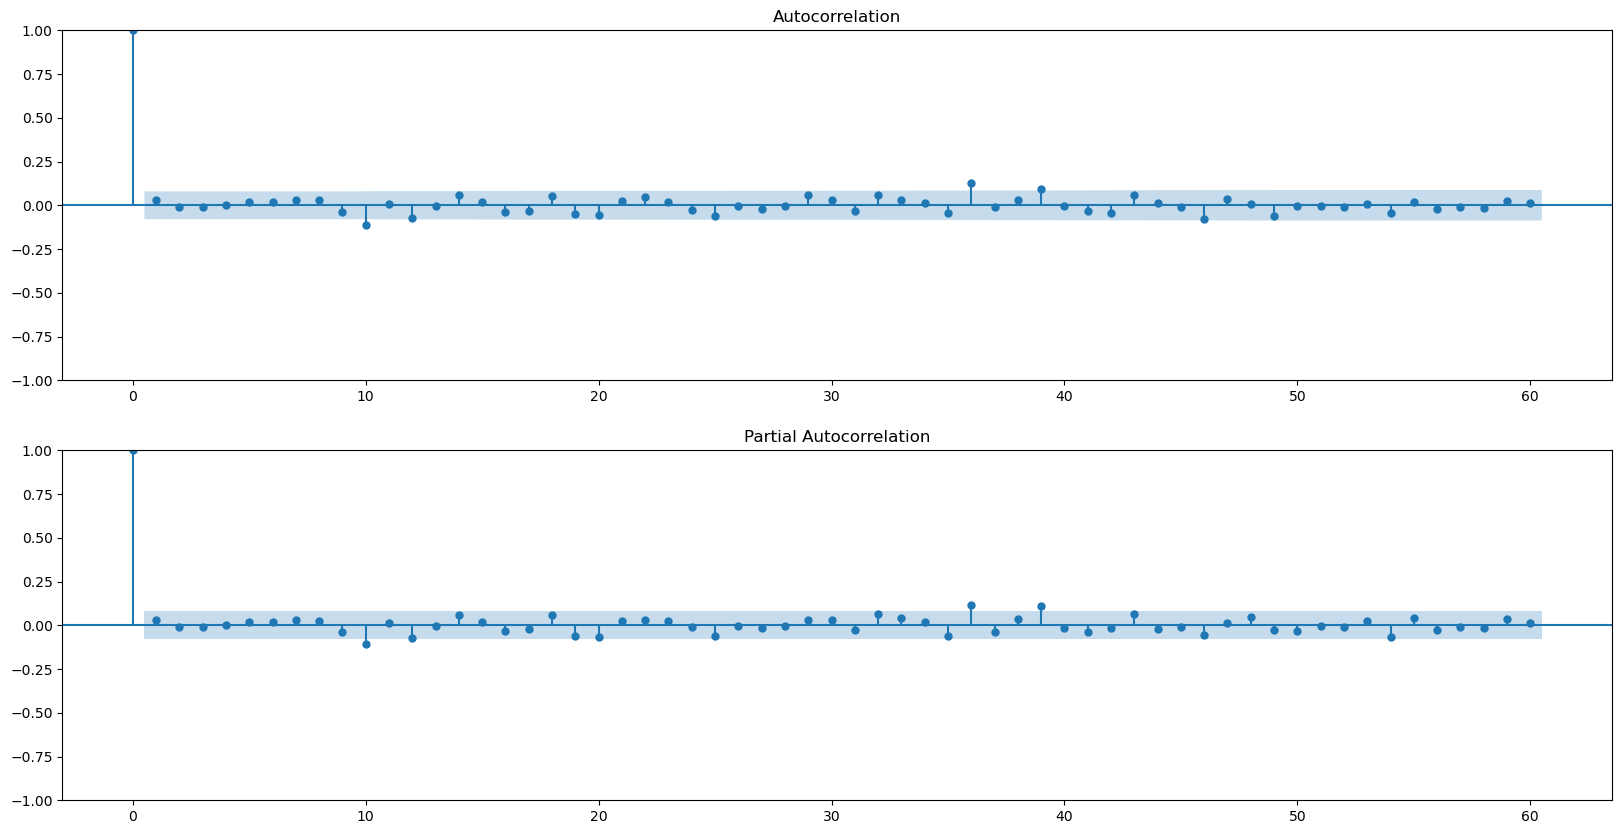

In [8]:
lags = 60
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
smts.graphics.plot_acf(candidate_model.resid, lags=lags, ax=axes[0])
smts.graphics.plot_pacf(candidate_model.resid, lags=lags, ax=axes[1])
plt.show()

In [9]:
acorr_ljungbox(candidate_model.resid, lags=[2*7], return_df=True, model_df=6)  # model_df = p + q

,lb_stat,lb_pvalue
14,15.647813,0.047708


In [10]:
candidate_model2 = sm.tsa.statespace.SARIMAX(df, order=(0, 1, 4), seasonal_order=(0, 1, 1, 7)).fit()
candidate_model2.summary()

C:\Users\silve\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\silve\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  607
Model:             SARIMAX(0, 1, 4)x(0, 1, [1], 7)   Log Likelihood               -4672.557
Date:                             Sun, 03 Dec 2023   AIC                           9357.114
Time:                                     23:58:28   BIC                           9383.485
Sample:                                 10-02-2012   HQIC                          9367.381
                                      - 05-31-2014                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3604      0.030    -12.003      0.000      -0.419      -0.302
ma.L2         -0.2415      0.036     -6.634      0.000      -0.313      -0.170
ma.L3         -0.0366      0.031     -1.196      0.232      -0.097       0.023
ma.L4         -0.2121      0.032     -6.630      0.000      -0.275      -0.149
ma.S.L7       -0.9160      0.015    -59.577      0.000      -0.946      -0.886
sigma2      3.416e+05   1.34e+04     25.578      0.000    3.15e+05    3.68e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               229.44
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               2.30   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

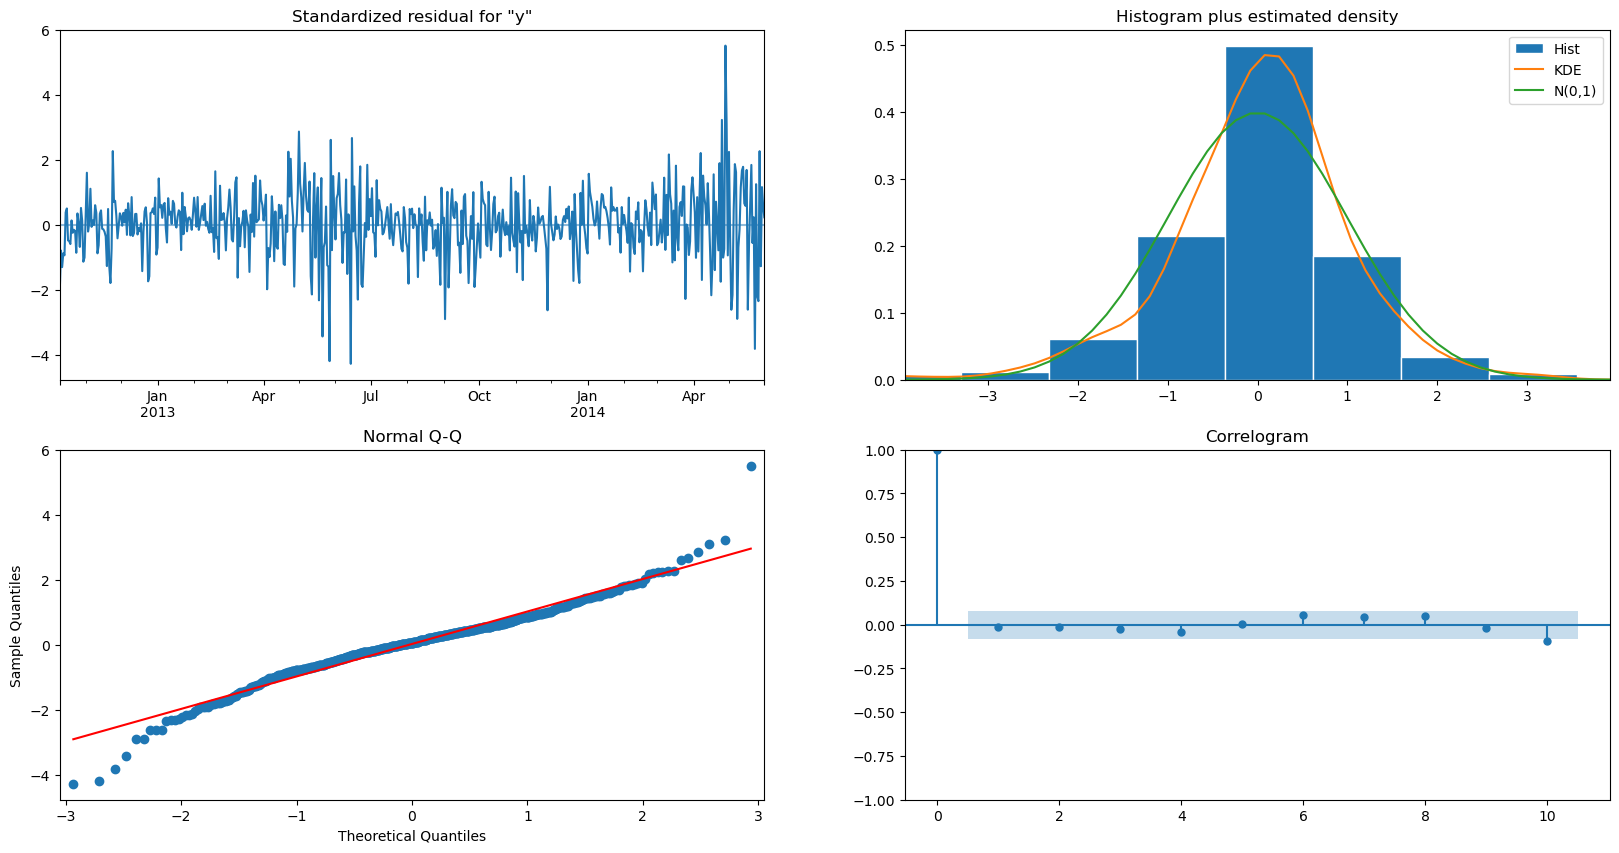

In [11]:
candidate_model2.plot_diagnostics(figsize=(20,10))
plt.show()

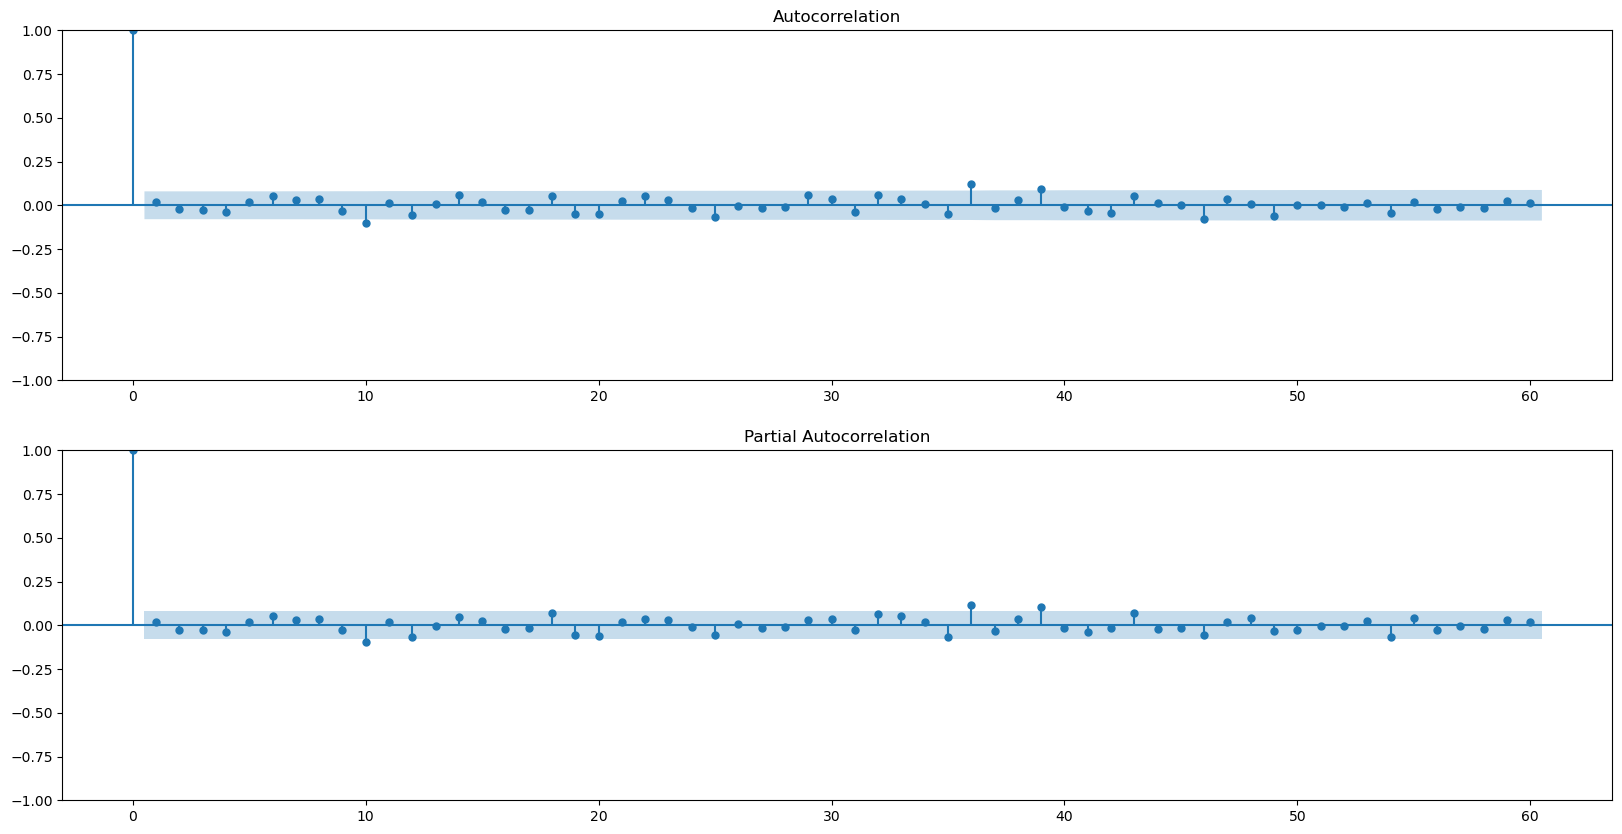

In [12]:
lags = 60
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
smts.graphics.plot_acf(candidate_model2.resid, lags=lags, ax=axes[0])
smts.graphics.plot_pacf(candidate_model2.resid, lags=lags, ax=axes[1])
plt.show()

In [13]:
acorr_ljungbox(candidate_model.resid2, lags=[2*7], return_df=True, model_df=4)  # model_df = p + q

AttributeError: 'SARIMAXResults' object has no attribute 'resid2'

In [ ]:
ps = range(0, 2)
qs = range(3, 6)

p = 0
d = 1 
q = 4

Ps = range(0, 2)
Qs = range(0, 3)

P = 0
D = 1 
Q = 1
s = 7

parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

In [ ]:
def gs_arima(series, parameters_list, d, D, s, opt_method='powell'):

    results = []
    models = {}
    best_aic = float("inf")

    for param in parameters_list:
        # we need try-except because on some combinations model might fail to converge
        try:
            model = sm.tsa.statespace.SARIMAX(
                series, 
                order=(param[0], d, param[1]), 
                seasonal_order=(param[2], D, param[3], s)).fit(method=opt_method, disp=False)
        except:
            continue

        aic = model.aic
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table, best_model

result_table, best_model = gs_arima(df, parameters_list, d, D, s)

result_table.head(10)

In [ ]:
best_model.summary()

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def plot_predictions(df, model, n_steps):
    """
        Plots model vs predicted values
        
        series - dataset with timeseries
        model - fitted model
        n_steps - number of steps to predict in the future
    """
    data = df.copy()
    data.columns = ['actual']
    data['arima_model'] = model.fittedvalues

    # forecast values
    data['arima_model'][:s+d] = np.NaN
    forecast = data['arima_model'].append(model.forecast(n_steps))

    # calculate error, again having shifted on s+d steps from the beginning
    error = mean_absolute_percentage_error(data['actual'][s+d:-n_steps], data['arima_model'][s+d:-n_steps])

    plt.figure(figsize=(20, 10))
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    plt.plot(forecast, color='r', label="model")
    plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    plt.plot(data.actual, label="actual", alpha=0.8)
    plt.legend()
    plt.grid(True)

plot_predictions(pd.DataFrame(series), best_model, 60)